# Backtesting Strategy
Add backtesting code here.import pandas as pd
import matplotlib.pyplot as plt

# 定义数据目录（相对于 Notebook 文件所在目录）
data_dir = '../data/stock-data'

# 要分析的标的列表
symbols = ['AAPL', 'TSLA', 'SPY']

# 加载到字典
data = {}
for sym in symbols:
    path = f'{data_dir}/{sym}.csv'
    df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
    data[sym] = df
    print(f"{sym}: {df.shape[0]} rows, columns = {df.columns.tolist()}")


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 定义数据目录并加载 CSV
data_dir = '../data/stock-data'
symbols = ['AAPL', 'TSLA', 'SPY']

data = {}
for sym in symbols:
    df = pd.read_csv(f'{data_dir}/{sym}.csv', parse_dates=['Date'], index_col='Date')
    data[sym] = df
    print(f"{sym}: {df.shape[0]} rows loaded")



AAPL: 250 rows loaded
TSLA: 250 rows loaded
SPY: 250 rows loaded


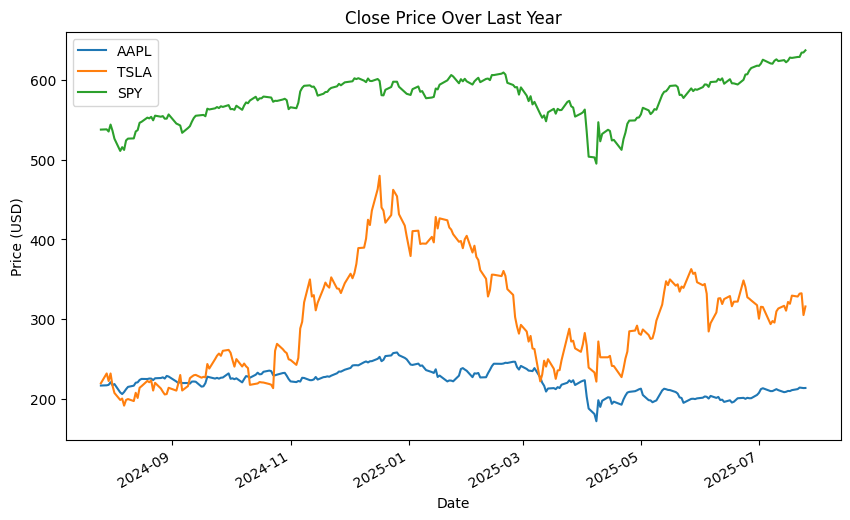

In [3]:
plt.figure(figsize=(10, 6))
for sym, df in data.items():
    df['Close'].plot(label=sym)
plt.title('Close Price Over Last Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


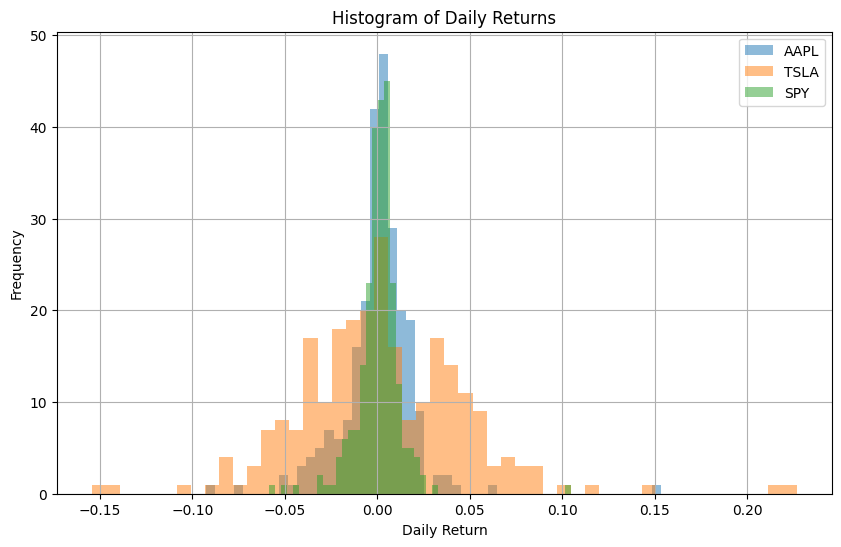

In [4]:
plt.figure(figsize=(10, 6))
for sym, df in data.items():
    returns = df['Close'].pct_change().dropna()
    returns.hist(bins=50, alpha=0.5, label=sym)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [5]:
stats = []
for sym, df in data.items():
    r = df['Close'].pct_change().dropna()
    stats.append({
        'Symbol': sym,
        'Mean Return': r.mean(),
        'Volatility': r.std()* (252**0.5),  # 年化波动率
        'Max Drawdown': ((df['Close']/df['Close'].cummax())-1).min()
    })
pd.DataFrame(stats).style.format({
    'Mean Return': "{:.4%}",
    'Volatility': "{:.2%}",
    'Max Drawdown': "{:.2%}"
})


,Symbol,Mean Return,Volatility,Max Drawdown
0,AAPL,0.0140%,31.72%,-33.36%
1,TSLA,0.2495%,73.05%,-53.77%
2,SPY,0.0762%,20.32%,-18.76%


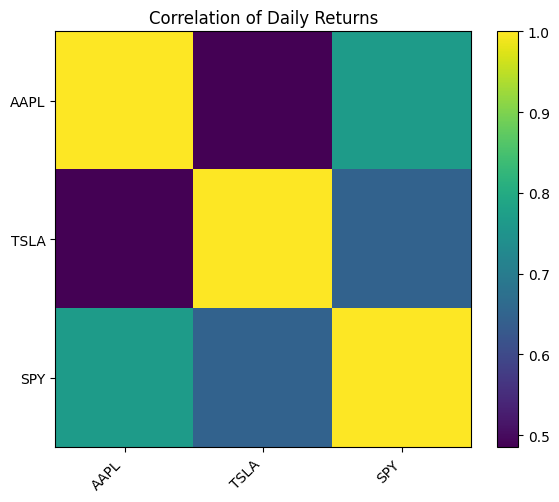

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 构造相关矩阵
returns_df = pd.concat(
    [data[sym]['Close'].pct_change().rename(sym) for sym in symbols],
    axis=1
).dropna()
corr = returns_df.corr()

# 绘图
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr.values, interpolation='none')
# 坐标轴标签
ax.set_xticks(range(len(corr)))
ax.set_yticks(range(len(corr)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.index)
# 添加颜色条
fig.colorbar(im, ax=ax)
ax.set_title('Correlation of Daily Returns')
plt.tight_layout()
plt.show()


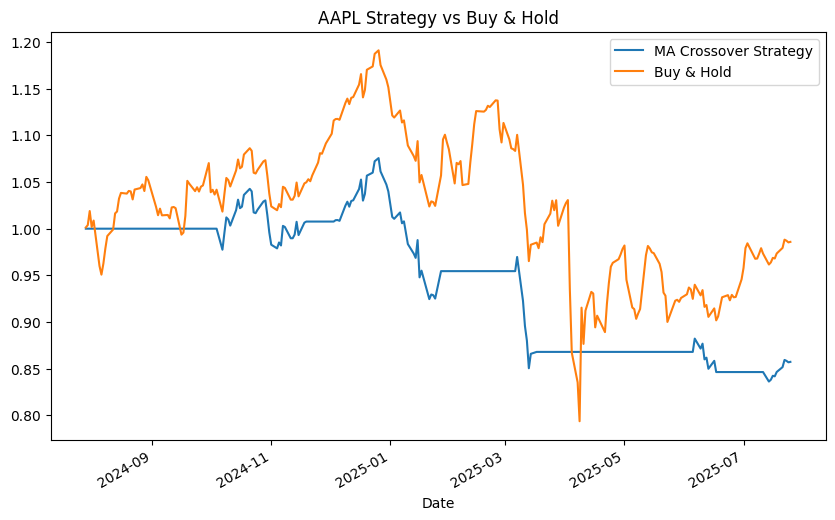

In [9]:
sym = 'AAPL'
df = data[sym].copy()
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()

# 生成信号：20日均线上穿50日均线做多，跌破平仓
df['Signal'] = 0
df.loc[df['MA20'] > df['MA50'], 'Signal'] = 1
df['Position'] = df['Signal'].shift(1)

# 策略日收益
df['StrategyRet'] = df['Position'] * df['Close'].pct_change()

# 累计对比
(1 + df['StrategyRet']).cumprod().plot(label='MA Crossover Strategy', figsize=(10,6))
(1 + df['Close'].pct_change().dropna()).cumprod().plot(label='Buy & Hold')
plt.title(f'{sym} Strategy vs Buy & Hold')
plt.legend()
plt.show()


In [11]:
import os
os.makedirs('../images', exist_ok=True)



In [12]:
plt.savefig('../images/close_price.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>